In [50]:
# Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.preprocessing import LabelEncoder

# Define the path to the Excel File
file_path = r"D:\Data Analyst - Tutorial\Portfolio Projects\Telecom\Source\vw_churn_data.csv"

# Read the data from the specified sheet into a pandas Dataframe
data = pd.read_csv(file_path)

# Display Data
print(data.head())

  customer_id  gender  age married        state  number_of_referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [51]:
# Data Processing
# Drop columns that won't use for prediction
data = data.drop(['customer_id', 'churn_category', 'churn_reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'customer_status'
data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('customer_status', axis=1)
y = data['customer_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Confusion Matrix:
[[788  50]
 [137 227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       838
           1       0.82      0.62      0.71       364

    accuracy                           0.84      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



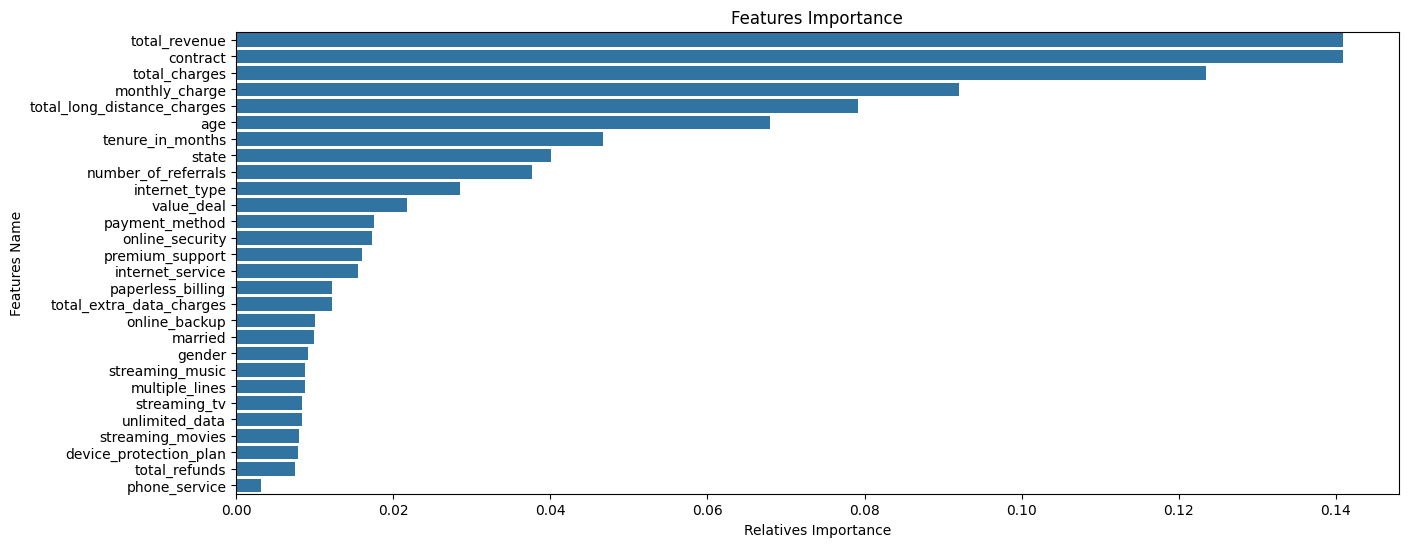

In [53]:
# Evaluate Model
# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature selection using Feature Importance
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]

# Plot the feature importances
plt.figure(figsize = (15,6))
sns.barplot(x=importance[indices], y=X.columns[indices])
plt.title('Features Importance')
plt.xlabel('Relatives Importance')
plt.ylabel('Features Name')
plt.show()

In [54]:
# Define the path to the Excel File
file_path_new_data = r"D:\Data Analyst - Tutorial\Portfolio Projects\Telecom\Source\vw_join_data.csv"

# Read New Data
new_data = pd.read_csv(file_path_new_data)

print(new_data.head())

  customer_id  gender  age married        state  number_of_referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [55]:
# Retain the original dataframe to preserve unencoded column
original_data = new_data.copy()

# Retain Customer ID column
customer_ids = new_data['customer_id']

# Drop Columns that won't be used for prediction in the encoded dataframe
new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make Predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original dataframe
original_data['customer_status_predicted'] = new_predictions

# Filter dataframe to include only records predicted as "Churned"
original_data = original_data[original_data['customer_status_predicted'] == 1]

# Save the result
original_data.to_csv(r"D:\Data Analyst - Tutorial\Portfolio Projects\Telecom\Source\original_data.csv")